<h1 style="text-align:center">Free Vibration of a Mass-Spring-Damper System</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $ 

*or*

$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Define the System Parameters
m = 1.0                   # kg
k = (2.0 * np.pi)**2.     # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k/m)         # Natural Frequency (rad/s)

z = 0.1                   # Define a desired damping ratio
c = 2*z*wn*m              # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1 - z**2) # Damped natural frequency (rad/s)

In [4]:
# Set up simulation parameters
t = np.linspace(0, 5, 501)          # Time for simulation, 0-5s with 501 points in-between

# Define the initial conditions x(0) = 1 and x_dot(0) = 0
x0 = np.array([-1.0, 0.0])

In [5]:
# Define x(t)
x = np.exp(-z*wn*t)*(x0[0]*np.cos(wd*t) + (z*wn*x0[0] + x0[1])/wd * np.sin(wd*t))

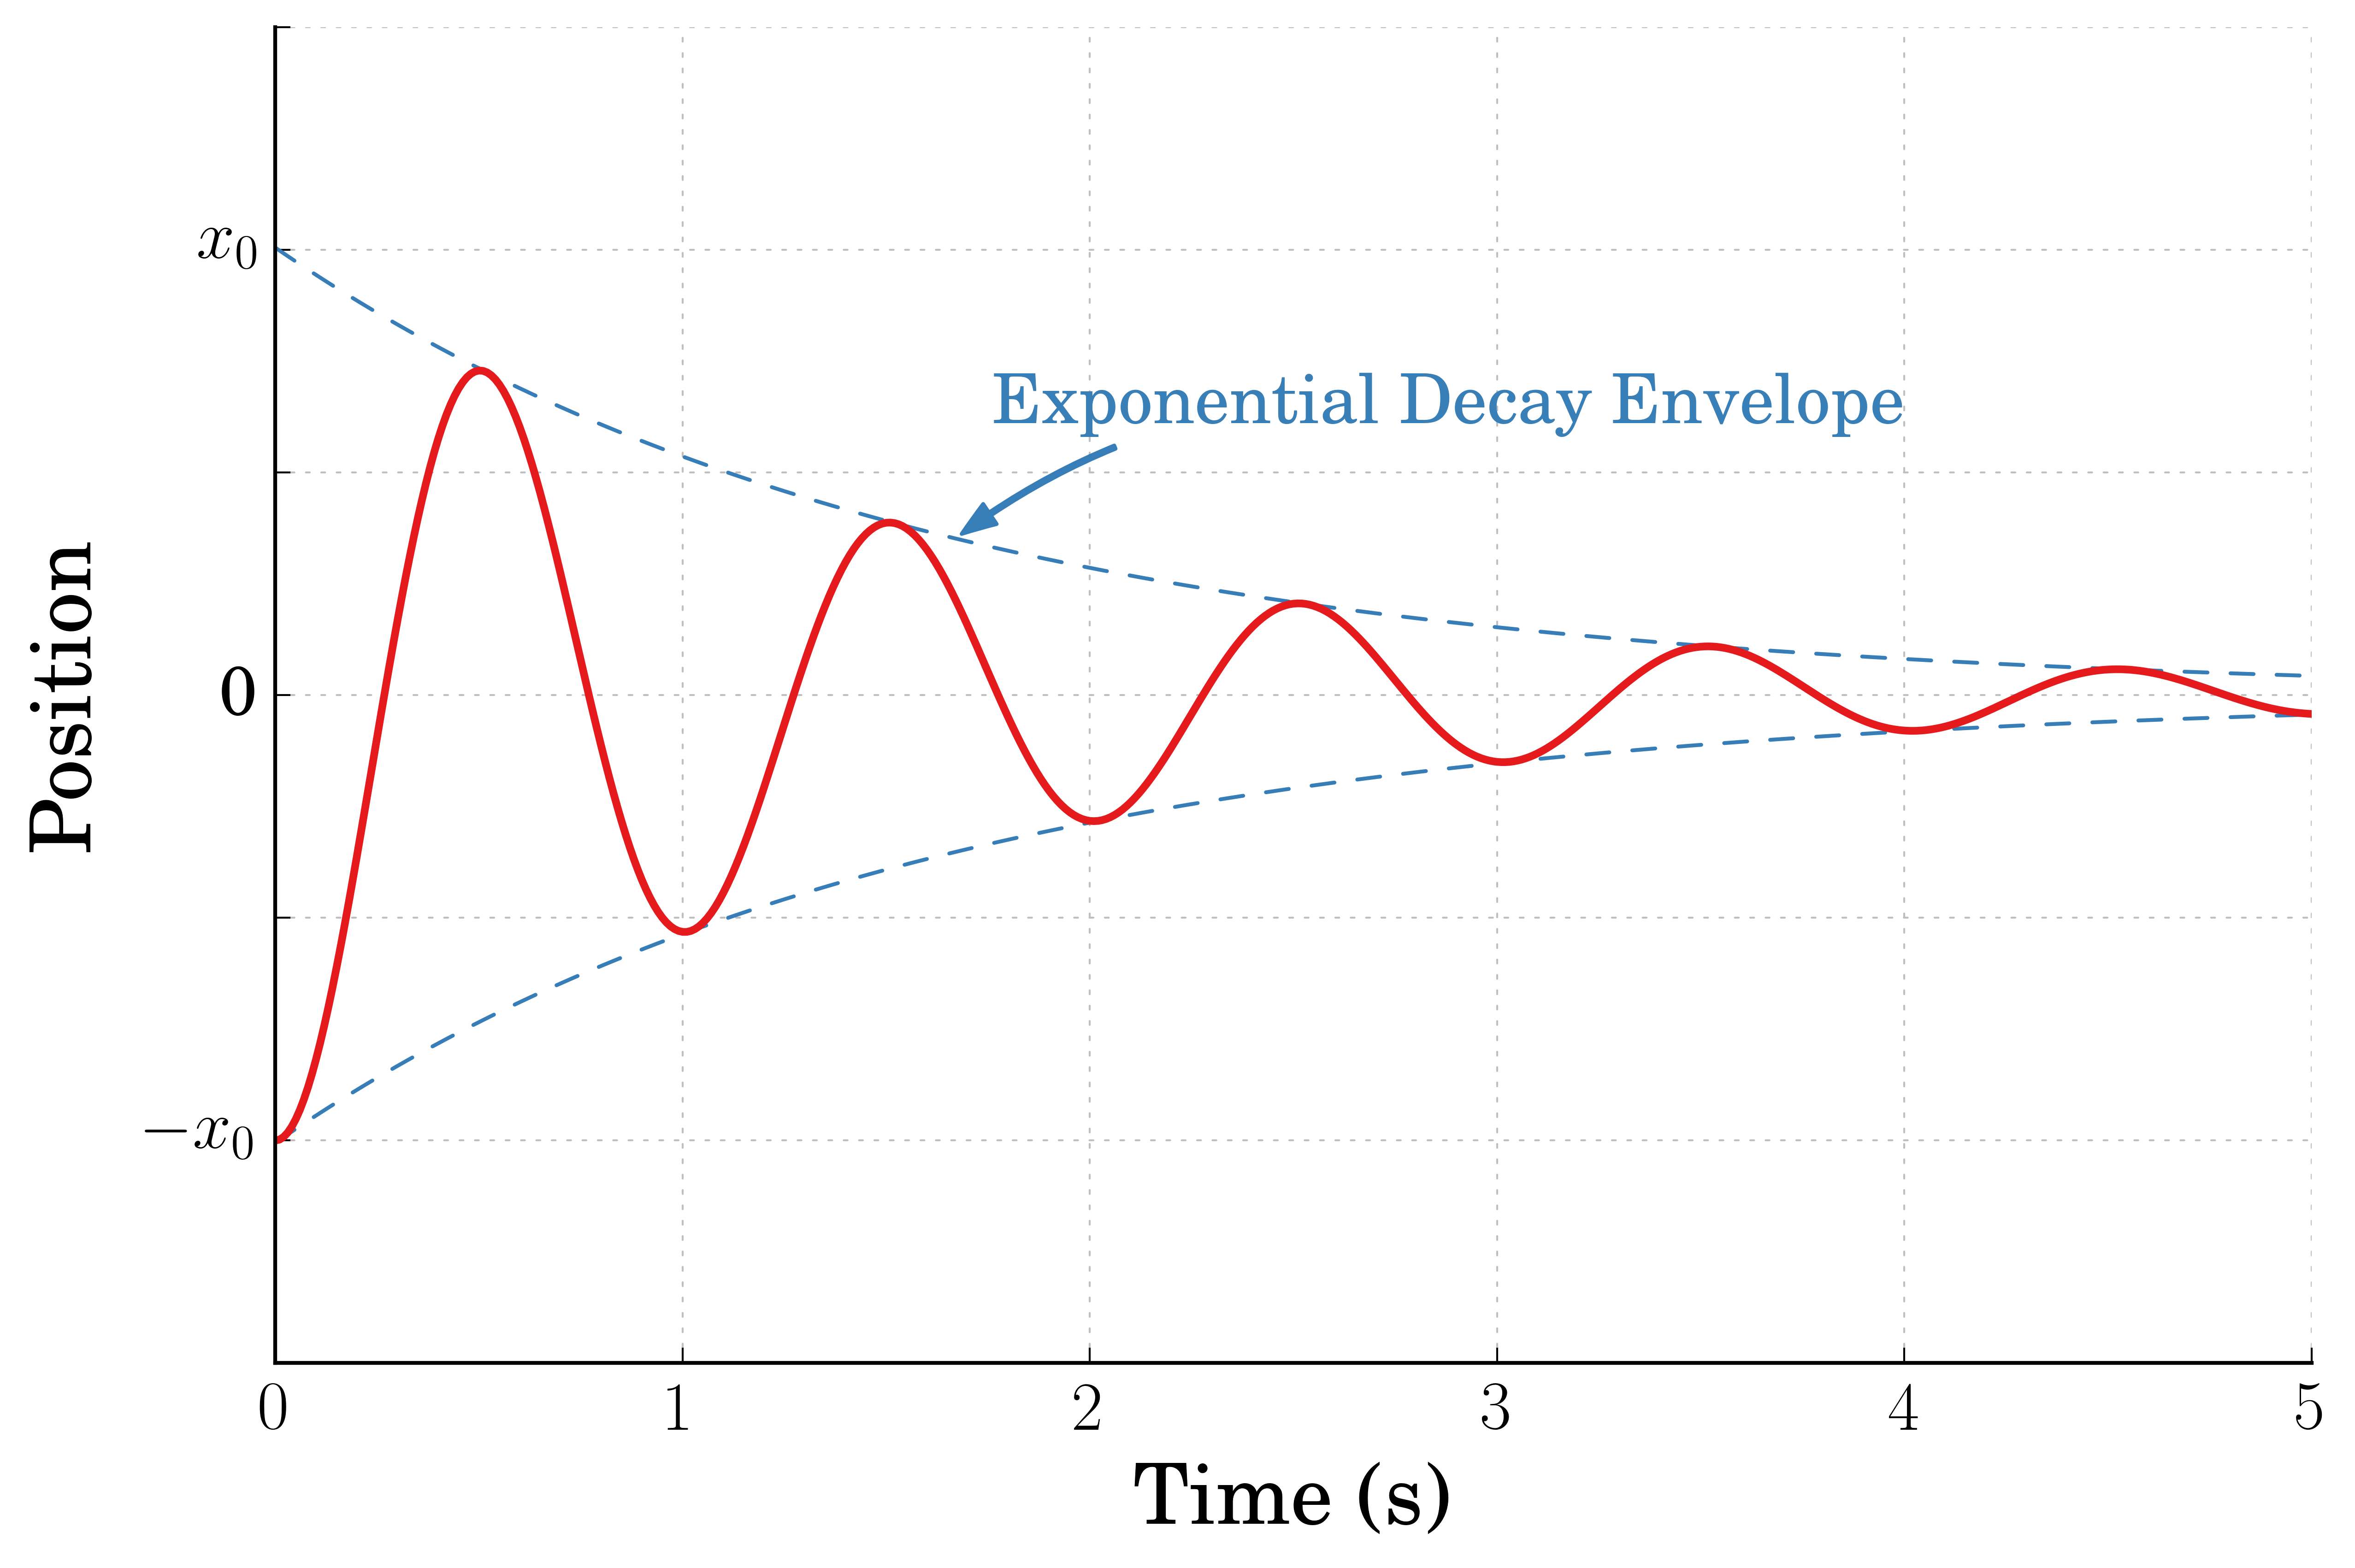

In [6]:
# # Make the figure pretty, then plot the results
# #   "pretty" parameters selected based on pdf output, not screen output
# #   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', family='serif', fontsize=22, weight='bold', labelpad=10)


amp = np.sqrt(x0[0]**2 + ((z*wn*x0[0] + x0[1])/wd)**2)
decay_env = amp * np.exp(-z*wn*t)

# plot the decay envelope
plt.plot(t, decay_env, linewidth=1.0, linestyle = '--', color = "#377eb8")
plt.plot(t, -decay_env, linewidth=1.0, linestyle = '--', color = "#377eb8")

plt.plot(t, x, linewidth=2, linestyle = '-', label=r'Response')

# uncomment below and set limits if needed
# xlim(0,5)
# ylim(0,10)

plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

plt.annotate('Exponential Decay Envelope',
         xy=(t[int(len(t)/3)],decay_env[int(len(t)/3)]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=18,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3, rad=.2", color="#377eb8"), color = "#377eb8")


# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_FreeVibrationWithDamping.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr class = "style-end">
#### Licenses
Code is licensed under a 3-clause BSD-style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [7]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())